In [1]:
from coagulation_model.coagulation_kernel import coagulation_kernel as kernel
from coagulation_model.plotting_kernels import plot_kernel_map
from coagulation_model.plotting_kernels import plot_normalized_kernel_map

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('notebook')

## Looking at Kriest kernels

In [2]:

default_kernel = kernel(
    list_of_applied_kernels=[
        'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='jackson_lochmann_fractal_settling_velocity'
    )

kries_dPAM_kernel = kernel(
    list_of_applied_kernels=[
        'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='kriest_power_law_settling_velocity_dSAM'
    )

kries_pPAM_kernel = kernel(
    list_of_applied_kernels=[
        'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='kriest_power_law_settling_velocity_pSAM'
    )

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Radius of particle i (m)', ylabel='Radius of particle j (m)'>)

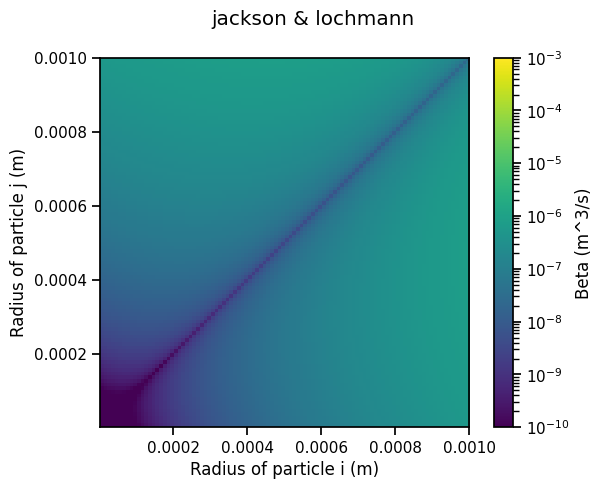

In [3]:
plot_kernel_map(default_kernel, 'jackson & lochmann', norm_range = [1e-10, 1e-3])

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Radius of particle i (m)', ylabel='Radius of particle j (m)'>)

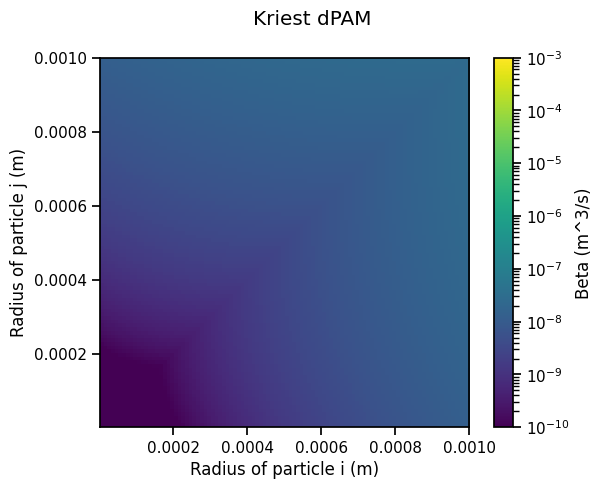

In [4]:
plot_kernel_map(kries_dPAM_kernel, 'Kriest dPAM', norm_range = [1e-10, 1e-3])

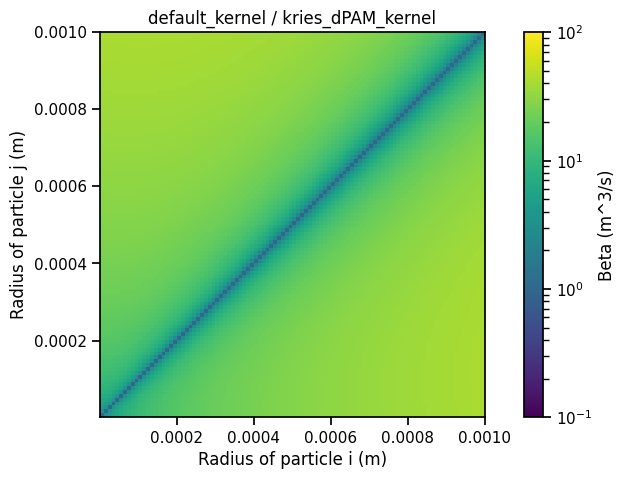

In [12]:
plot_normalized_kernel_map(
    default_kernel, 'default_kernel', 
    kries_dPAM_kernel, 'kries_dPAM_kernel',
    r_min=1e-6, r_max=1e-3,
    norm_range=[1e-1, 1e+2]
)

## Looking at sinking velocities presented in Kriest

In [13]:
from coagulation_model.coagulation_kernel import coagulation_kernel as kernel
from coagulation_model.plotting_kernels import plot_kernel_map
from coagulation_model.plotting_kernels import plot_normalized_kernel_map

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('notebook')

In [14]:
krist_dPAM_kernel = kernel(
    list_of_applied_kernels=[
        # 'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='kriest_power_law_settling_velocity_dSAM'
    )

jackson_lochmann_kernel = kernel(
    list_of_applied_kernels=[
        # 'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='jackson_lochmann_fractal_settling_velocity'
    )

In [15]:
radius = np.linspace(1e-6,1e-3,100)

volume = 4/3*np.pi*radius**3

v_dPAM = krist_dPAM_kernel.kriest_power_law_settling_velocity_dSAM(volume)
v_pPAM = krist_dPAM_kernel.kriest_power_law_settling_velocity_pSAM(volume)
v_jackson = jackson_lochmann_kernel.jackson_lochmann_fractal_settling_velocity(volume)


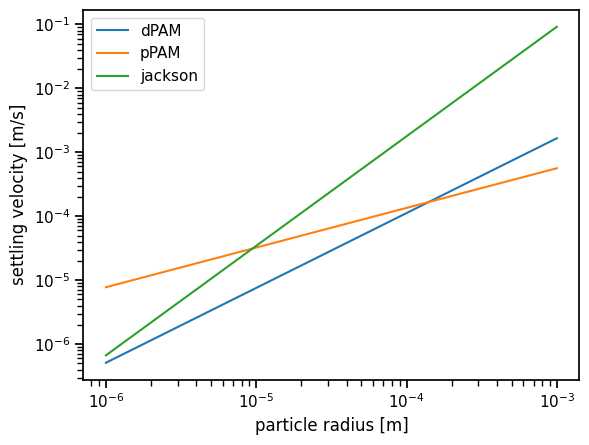

In [16]:
# plot the settling velocity

fig,ax = plt.subplots()
ax.plot(radius,v_dPAM, label='dPAM')
ax.plot(radius,v_pPAM, label='pPAM')
ax.plot(radius,v_jackson, label='jackson')
ax.set_xlabel('particle radius [m]')
ax.set_ylabel('settling velocity [m/s]')

ax.set_yscale('log')
ax.set_xscale('log')

ax.legend()

In [17]:
radius_i = np.linspace(1e-6,1e-4,100000)
radius_j = 1e-5


volume_i = 4/3*np.pi*radius_i**3
volume_j = 4/3*np.pi*radius_j**3

delta_v_krist_dPAM = np.abs(
    krist_dPAM_kernel.kriest_power_law_settling_velocity_dSAM(volume_i) - krist_dPAM_kernel.kriest_power_law_settling_velocity_dSAM(volume_j)
)

delta_v_krist_pPAM = np.abs(
    krist_dPAM_kernel.kriest_power_law_settling_velocity_pSAM(volume_i) - krist_dPAM_kernel.kriest_power_law_settling_velocity_pSAM(volume_j)
)


delta_v_jackson = np.abs(
    jackson_lochmann_kernel.jackson_lochmann_fractal_settling_velocity(volume_i) - jackson_lochmann_kernel.jackson_lochmann_fractal_settling_velocity(volume_j)
)


Text(0.5, 1.0, 'Coagulation kernel for 1e-5 m particle')

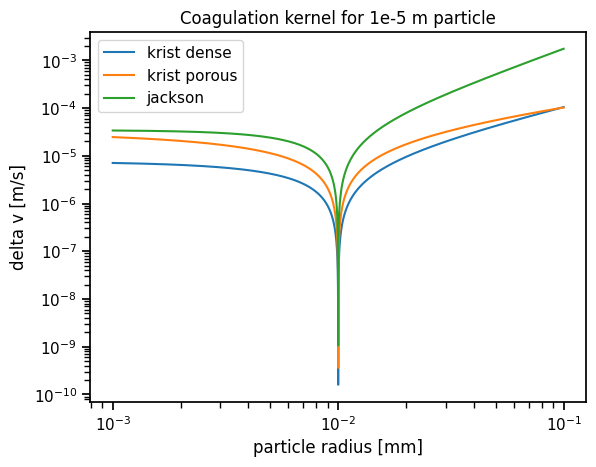

In [18]:
fig,ax = plt.subplots()
ax.plot(radius_i*1e3,delta_v_krist_dPAM, label='krist dense')
ax.plot(radius_i*1e3,delta_v_krist_pPAM, label='krist porous')
ax.plot(radius_i*1e3,delta_v_jackson, label='jackson')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('particle radius [mm]')
ax.set_ylabel('delta v [m/s]')
ax.legend()
ax.set_title('Coagulation kernel for 1e-5 m particle')

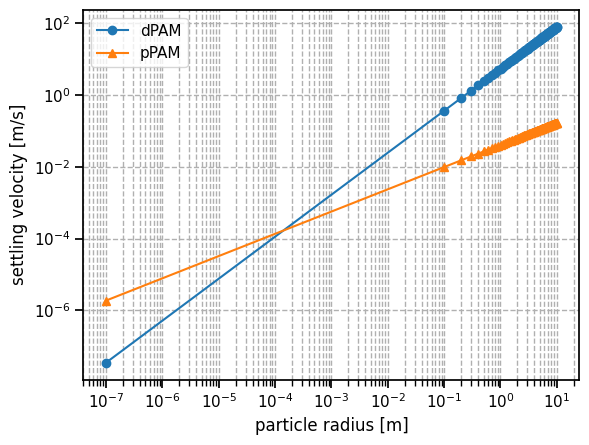

In [10]:
radius_i = np.linspace(1e-7,1e1,100) # m
volume_i = 4/3*np.pi*radius_i**3 # m**3

v_dPAM = krist_dPAM_kernel.kriest_power_law_settling_velocity(volume_i, B = 942 , eta = 1.17)
v_pPAM = krist_dPAM_kernel.kriest_power_law_settling_velocity(volume_i, B = 132 , eta = 0.62)

# Ref 1: 91d0:26
# v_1 = krist_dPAM_kernel.kriest_power_law_settling_velocity(volume_i, B = 91, eta = 0.26) 
# v_3 = krist_dPAM_kernel.kriest_power_law_settling_velocity(volume_i, B = 579, eta = 0.57) 


plt.plot(radius_i,v_dPAM, label='dPAM', marker='o')
plt.plot(radius_i,v_pPAM, label='pPAM', marker='^')
# plt.plot( radius_i, v_1, label='1: 91d^0.26', marker='o')
# plt.plot( radius_i ,v_3, label='3: 579d^0.57', marker='s')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('particle radius [m]')
plt.ylabel('settling velocity [m/s]')
# plt.xlim([0.0001,10])
# plt.ylim([0.01,10000])
plt.legend()
plt.grid(which='both',linestyle='--')

# labels in floating point notation
# from matplotlib.ticker import ScalarFormatter
# plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Use ScalarFormatter for y-axis tick labels
# plt.gca().xaxis.set_major_formatter(ScalarFormatter())  # Use ScalarFormatter for y-axis tick labels


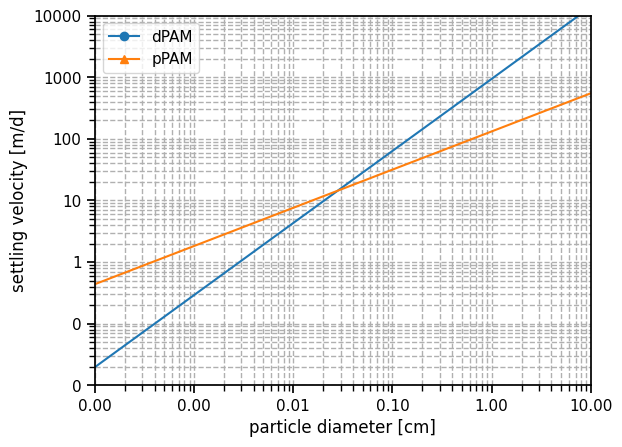

In [7]:
radius_i = np.linspace(1e-7,1e1,100) # m
volume_i = 4/3*np.pi*radius_i**3 # m**3

v_dPAM = krist_dPAM_kernel.kriest_power_law_settling_velocity(volume_i, B = 942 , eta = 1.17)
v_pPAM = krist_dPAM_kernel.kriest_power_law_settling_velocity(volume_i, B = 132 , eta = 0.62)

# Ref 1: 91d0:26
# v_1 = krist_dPAM_kernel.kriest_power_law_settling_velocity(volume_i, B = 91, eta = 0.26) 
# v_3 = krist_dPAM_kernel.kriest_power_law_settling_velocity(volume_i, B = 579, eta = 0.57) 


plt.plot(2*radius_i*100,v_dPAM*86400, label='dPAM', marker='o')
plt.plot(2*radius_i*100,v_pPAM*86400, label='pPAM', marker='^')
# plt.plot( radius_i, v_1, label='1: 91d^0.26', marker='o')
# plt.plot( radius_i ,v_3, label='3: 579d^0.57', marker='s')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('particle diameter [cm]')
plt.ylabel('settling velocity [m/d]')
plt.xlim([0.0001,10])
plt.ylim([0.01,10000])
plt.legend()
plt.grid(which='both',linestyle='--')

# labels in floating point notation
from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter())  # Use ScalarFormatter for y-axis tick labels
plt.gca().xaxis.set_major_formatter(ScalarFormatter())  # Use ScalarFormatter for y-axis tick labels


In [ ]:
krist_dPAM_kernel = kernel(
    list_of_applied_kernels=[
        # 'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='kriest_power_law_settling_velocity_dSAM'
    )

jackson_lochmann_kernel = kernel(
    list_of_applied_kernels=[
        # 'rectilinear_shear',
        'rectilinear_differential_sedimentation'],
    settling_function='jackson_lochmann_fractal_settling_velocity'
    )

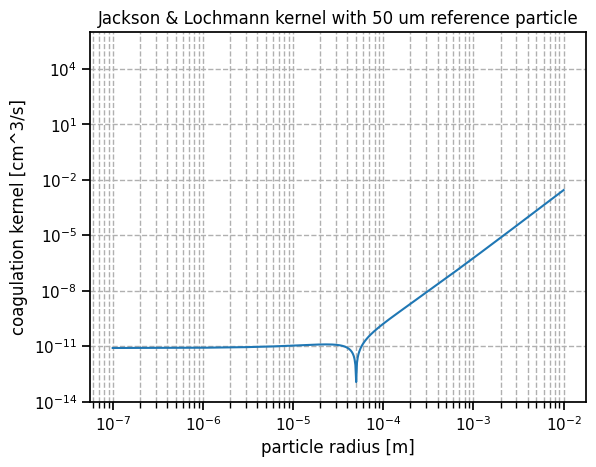

In [28]:
r_reference = 50e-6
r_test = np.linspace(1e-7,1e-2,10000)

betas = jackson_lochmann_kernel.evaluate_kernel(r_reference,r_test) # m^3/s
# in cm^3/s
betas = betas

plt.xscale('log')
plt.yscale('log')

plt.plot(r_test,betas)

plt.xlabel('particle radius [m]')   
plt.ylabel('coagulation kernel [cm^3/s]')
plt.title('Jackson & Lochmann kernel with 50 um reference particle')
plt.ylim([1e-14,1e6])

plt.grid(which='both',linestyle='--')